In [40]:
import math                          
import numpy as np                   
import pandas as pd                  
import scipy                         
import statsmodels.api as sm        
import matplotlib.pyplot as pyplot            
import seaborn as sns               
sns.set() 
import sys
sys.setrecursionlimit(1500)


In [41]:
df=pd.read_csv('total (1).csv',encoding='latin1')
df

,content,time,title
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par..."
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...
...,...,...,...
4974,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m...","24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...
4975,Former cricketer Sachin Tendulkar was spotted ...,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...
4976,"Aamir Khan, whose last film Dangal told the st...","03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...
4977,Maharahstra Power Minister Chandrashekhar Bawa...,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused..."


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4852 non-null   object
 1   time     4977 non-null   object
 2   title    4977 non-null   object
dtypes: object(3)
memory usage: 116.8+ KB


In [43]:
content=df['title'][1]
content


'Global labour income estimated to have declined by 3.5 trillion USD in first 3 quarters of 2020: ILO'

In [44]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
import re
content=re.sub('[^a-zA-Z]',' ',str(df['title'][1]))
content=content.lower()
content

'global labour income estimated to have declined by     trillion usd in first   quarters of       ilo'

In [46]:
# To map POS tag to first character
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [47]:
word_list = nltk.word_tokenize(content)
print(word_list)
#Tokenize the sentenc

['global', 'labour', 'income', 'estimated', 'to', 'have', 'declined', 'by', 'trillion', 'usd', 'in', 'first', 'quarters', 'of', 'ilo']


In [48]:
word_list = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(word_list)

global labour income estimated to have declined by trillion usd in first quarter of ilo


In [49]:
#Removing stopwords
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [50]:
content

'global labour income estimated to have declined by     trillion usd in first   quarters of       ilo'

In [51]:
remove_stopwords(content, is_lower_case=False)

'global labour income estimated declined trillion usd first quarters ilo'

In [52]:
import re
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus=[]
for i in range(0,4900):
    content=re.sub('[^a-zA-Z]',
                   ' ',
                   str(df['title'][i]))
    content=content.lower()
    word_list = nltk.word_tokenize(content)
    word_list=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]
    word_list = ' '.join( word_list)
    word_list=remove_stopwords(word_list, is_lower_case=False)
    corpus.append(word_list)
corpus

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['anil ambani discloses worldwide asset tell uk court lead discipline lavish lifestyle',
 'global labour income estimate decline trillion usd first quarter ilo',
 'harley davidson exit india seek local partner serve exist customer',
 'rupee depreciates paisa u dollar early trade',
 'jio start offering mobile service international flight',
 'bytedance applies tech export licence china amid tiktok deal talk',
 'reliance jio begin flight mobile service',
 'harley davidson put brake india biz',
 'flipkart wholesale enters new city ahead festive season',
 'sensex crash point amid global sell nifty slip',
 'black monday dalal street',
 'sensex snap day lose streak rally point reclaim mark',
 'sensex nifty spiral low th day stock buck trend',
 'parliament pass bill provide relief taxpayer compliance front amid covid',
 'post paid tariff war jio unveils jiopostpaid plus entertainment int l roam benefit',
 'swiggy delivery executive strike hyderabad company say disruption service',
 'trai recom

In [14]:
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)
w2v_model

In [15]:
w2v_vectors = w2v_model.wv.vectors # here you load vectors for each word in your model
w2v_indices = {word: w2v_model.wv.vocab[word].index for word in w2v_model.wv.vocab} # here you load indices - with whom you can find an index of the particular word in your model
def vectorize(line): 
    words = []
    for word in line: # line - iterable, for example list of tokens 
        try:
            w2v_idx = w2v_indices[word]
        except KeyError: # if you does not have a vector for this word in your w2v model, continue 
            continue
        words.append(w2v_vectors[w2v_idx])
        if words: 
            words = np.asarray(words)
            min_vec = words.min(axis=0)
            max_vec = words.max(axis=0)
            return np.concatenate((min_vec, max_vec))
        if not words:
            return None 
l=[]
for i in corpus:
    l.append(vectorize(i))
x=np.array(l)
x
features=np.array(l)


In [16]:
len(x)

4900

In [17]:
x.shape

(4900, 30)

In [18]:
vec_df = pd.DataFrame(x)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.871747,-0.379031,-0.985386,-1.041423,0.754350,-1.109883,0.686170,1.334053,-0.091552,-0.091117,-0.227248,-0.555660,0.799923,1.314595,0.195712,0.871747,-0.379031,-0.985386,-1.041423,0.754350,-1.109883,0.686170,1.334053,-0.091552,-0.091117,-0.227248,-0.555660,0.799923,1.314595,0.195712
1,0.166199,-0.364390,0.745431,-0.185430,0.099812,0.496093,0.845567,1.266787,-1.454920,-0.150163,-0.421619,-0.581238,0.170353,0.411438,0.913385,0.166199,-0.364390,0.745431,-0.185430,0.099812,0.496093,0.845567,1.266787,-1.454920,-0.150163,-0.421619,-0.581238,0.170353,0.411438,0.913385
2,1.488144,0.061798,0.345642,-1.593145,0.992582,0.163620,-0.120833,0.929156,1.486115,0.122277,-0.749900,-0.886402,1.162750,0.397406,-0.524354,1.488144,0.061798,0.345642,-1.593145,0.992582,0.163620,-0.120833,0.929156,1.486115,0.122277,-0.749900,-0.886402,1.162750,0.397406,-0.524354
3,-0.165494,-0.447273,-0.415691,-0.612062,-0.124569,0.077011,0.512853,0.548984,-0.329625,-0.420068,0.671579,-0.389099,0.707795,-0.289618,0.850579,-0.165494,-0.447273,-0.415691,-0.612062,-0.124569,0.077011,0.512853,0.548984,-0.329625,-0.420068,0.671579,-0.389099,0.707795,-0.289618,0.850579
4,-0.832395,0.172004,0.413733,-1.404012,0.970645,0.156135,0.091715,2.696615,0.456804,-0.062363,0.264116,-0.217237,-0.471278,-0.097851,0.963627,-0.832395,0.172004,0.413733,-1.404012,0.970645,0.156135,0.091715,2.696615,0.456804,-0.062363,0.264116,-0.217237,-0.471278,-0.097851,0.963627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,0.936651,-1.971179,0.351220,-0.834302,0.496781,0.559283,-0.977102,0.476946,-0.016330,-0.743258,0.812478,-0.292381,-0.074342,0.080298,-0.247928,0.936651,-1.971179,0.351220,-0.834302,0.496781,0.559283,-0.977102,0.476946,-0.016330,-0.743258,0.812478,-0.292381,-0.074342,0.080298,-0.247928
4896,0.320069,0.275476,0.242120,-0.695588,0.614614,0.175634,0.366519,0.358393,0.550128,-0.071197,-0.735989,-0.906635,1.233979,0.610110,0.306916,0.320069,0.275476,0.242120,-0.695588,0.614614,0.175634,0.366519,0.358393,0.550128,-0.071197,-0.735989,-0.906635,1.233979,0.610110,0.306916
4897,0.871747,-0.379031,-0.985386,-1.041423,0.754350,-1.109883,0.686170,1.334053,-0.091552,-0.091117,-0.227248,-0.555660,0.799923,1.314595,0.195712,0.871747,-0.379031,-0.985386,-1.041423,0.754350,-1.109883,0.686170,1.334053,-0.091552,-0.091117,-0.227248,-0.555660,0.799923,1.314595,0.195712
4898,-0.165494,-0.447273,-0.415691,-0.612062,-0.124569,0.077011,0.512853,0.548984,-0.329625,-0.420068,0.671579,-0.389099,0.707795,-0.289618,0.850579,-0.165494,-0.447273,-0.415691,-0.612062,-0.124569,0.077011,0.512853,0.548984,-0.329625,-0.420068,0.671579,-0.389099,0.707795,-0.289618,0.850579


In [19]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(x)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899
0,1.000000,0.356896,0.567345,0.416997,0.377201,0.587820,0.416997,0.567345,0.253541,0.333304,0.587820,0.333304,0.333304,0.416997,0.416997,0.356896,0.416997,0.333304,0.567345,0.333304,0.680388,0.333304,0.356896,0.253541,0.416997,0.356896,0.132904,0.567345,0.269423,0.356896,0.253541,0.587820,0.333304,0.680388,0.333304,0.357254,0.567345,0.333304,0.356896,1.000000,...,0.587820,0.356896,0.200559,0.200559,0.416997,0.333304,0.333304,0.567345,0.567345,0.416997,0.132904,0.356896,1.000000,0.333304,1.000000,0.416997,0.680388,0.416997,1.000000,0.333304,0.416997,0.200559,1.000000,0.587820,0.416997,0.333304,0.132904,0.416997,1.000000,0.567345,0.253541,1.000000,0.587820,1.000000,0.132904,0.200559,0.587820,1.000000,0.416997,1.000000
1,0.356896,1.000000,0.061435,0.472111,0.441958,0.329888,0.472111,0.061435,0.632436,0.607967,0.329888,0.607967,0.607967,0.472111,0.472111,1.000000,0.472111,0.607967,0.061435,0.607967,0.292397,0.607967,1.000000,0.632436,0.472111,1.000000,0.714130,0.061435,0.511005,1.000000,0.632436,0.329888,0.607967,0.292397,0.607967,0.388349,0.061435,0.607967,1.000000,0.356896,...,0.329888,1.000000,0.147531,0.147531,0.472111,0.607967,0.607967,0.061435,0.061435,0.472111,0.714130,1.000000,0.356896,0.607967,0.356896,0.472111,0.292397,0.472111,0.356896,0.607967,0.472111,0.147531,0.356896,0.329888,0.472111,0.607967,0.714130,0.472111,0.356896,0.061435,0.632436,0.356896,0.329888,0.356896,0.714130,0.147531,0.329888,0.356896,0.472111,0.356896
2,0.567345,0.061435,1.000000,0.069528,0.340530,0.804145,0.069528,1.000000,0.300682,0.196771,0.804145,0.196771,0.196771,0.069528,0.069528,0.061435,0.069528,0.196771,1.000000,0.196771,0.580823,0.196771,0.061435,0.300682,0.069528,0.061435,0.071394,1.000000,0.094906,0.061435,0.300682,0.804145,0.196771,0.580823,0.196771,0.280581,1.000000,0.196771,0.061435,0.567345,...,0.804145,0.061435,0.338816,0.338816,0.069528,0.196771,0.196771,1.000000,1.000000,0.069528,0.071394,0.061435,0.567345,0.196771,0.567345,0.069528,0.580823,0.069528,0.567345,0.196771,0.069528,0.338816,0.567345,0.804145,0.069528,0.196771,0.071394,0.069528,0.567345,1.000000,0.300682,0.567345,0.804145,0.567345,0.071394,0.338816,0.804145,0.567345,0.069528,0.567345
3,0.416997,0.472111,0.069528,1.000000,0.421036,0.267845,1.000000,0.069528,0.468828,0.337515,0.267845,0.337515,0.337515,1.000000,1.000000,0.472111,1.000000,0.337515,0.069528,0.337515,0.197329,0.337515,0.472111,0.468828,1.000000,0.472111,0.521704,0.069528,0.233784,0.472111,0.468828,0.267845,0.337515,0.197329,0.337515,0.427255,0.069528,0.337515,0.472111,0.416997,...,0.267845,0.472111,0.273943,0.273943,1.000000,0.337515,0.337515,0.069528,0.069528,1.000000,0.521704,0.472111,0.416997,0.337515,0.416997,1.000000,0.197329,1.000000,0.416997,0.337515,1.000000,0.273943,0.416997,0.267845,1.000000,0.337515,0.521704,1.000000,0.416997,0.069528,0.468828,0.416997,0.267845,0.416997,0.521704,0.273943,0.267845,0.416997,1.000000,0.416997
4,0.377201,0.441958,0.340530,0.421036,1.000000,0.300101,0.421036,0.340530,0.327666,0.665842,0.300101,0.665842,0.665842,0.421036,0.421036,0.441958,0.421036,0.665842,0.340530,0.665842,0.361075,0.665842,0.441958,0.327666,0.421036,0.441958,0.600949,0.340530,0.331214,0.441958,0.327666,0.300101,0.665842,0.361075,0.665842,0.959186,0.340530,0.665842,0.441958,0.377201,...,0.300101,0.441958,0.197677,0.197677,0.421036,0.665842,0.665842,0.340530,0.340530,0.421036,0.600949,0.441958,0.377201,0.665842,0.377201,0.421036,0.361075,0.421036,0.377201,0.665842,0.421036,0.197677,0.377201,0.300101,0.421036,0.665842,0.600949,0.421036,0.377201,0.340530,0.327666,0.377201,0.300101,0.377201,0.600949,0.197677,0.300101,0.377201,0.421036,0.377201
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [20]:
similarity_matrix

array([[1.        , 0.35689583, 0.5673447 , ..., 1.        , 0.41699675,
        1.        ],
       [0.35689583, 1.0000001 , 0.06143533, ..., 0.35689583, 0.4721112 ,
        0.35689583],
       [0.5673447 , 0.06143533, 1.0000001 , ..., 0.5673447 , 0.06952784,
        0.5673447 ],
       ...,
       [1.        , 0.35689583, 0.5673447 , ..., 1.        , 0.41699675,
        1.        ],
       [0.41699675, 0.4721112 , 0.06952784, ..., 0.41699675, 0.9999999 ,
        0.41699675],
       [1.        , 0.35689583, 0.5673447 , ..., 1.        , 0.41699675,
        1.        ]], dtype=float32)

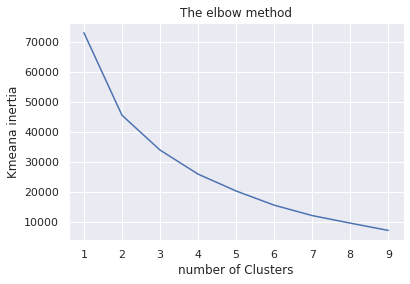

In [21]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
pyplot.plot(range(1,10),wcss) 
pyplot.title("The elbow method")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("Kmeana inertia")
pyplot.show()

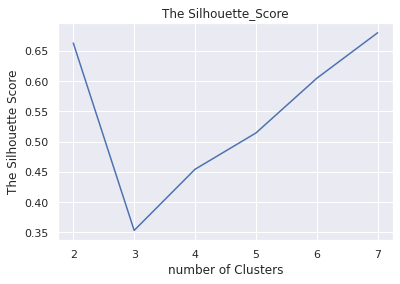

In [22]:
from matplotlib import pyplot
from pandas import DataFrame
import seaborn as sns 
import pandas as pd
from sklearn.metrics import silhouette_score

#Evaluation with unlabelled dataset
#The best value is 1 and the worst value is -1. 
#Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, 
#as a different cluster is more similar.
from sklearn.cluster import KMeans
Silhouette_score=[]
for i in range(2,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    sil_score=silhouette_score(x, labels=kmeans.fit_predict(x)) 
    Silhouette_score.append(sil_score)
Silhouette_score
number_of_Clusters=[2,3,4,5,6,7]
pyplot.plot(range(2,8),Silhouette_score) 
pyplot.title("The Silhouette_Score")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("The Silhouette Score")
pyplot.show()

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=0)
km.fit_transform(similarity_matrix)
cluster_labels1 = km.labels_

In [24]:
cluster_labels = pd.DataFrame(cluster_labels1, columns=['ClusterLabel'])
cluster_labels

,ClusterLabel
0,4
1,2
2,1
3,3
4,2
...,...
4895,0
4896,1
4897,4
4898,3


In [25]:
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899
0,1.000000,0.356896,0.567345,0.416997,0.377201,0.587820,0.416997,0.567345,0.253541,0.333304,0.587820,0.333304,0.333304,0.416997,0.416997,0.356896,0.416997,0.333304,0.567345,0.333304,0.680388,0.333304,0.356896,0.253541,0.416997,0.356896,0.132904,0.567345,0.269423,0.356896,0.253541,0.587820,0.333304,0.680388,0.333304,0.357254,0.567345,0.333304,0.356896,1.000000,...,0.587820,0.356896,0.200559,0.200559,0.416997,0.333304,0.333304,0.567345,0.567345,0.416997,0.132904,0.356896,1.000000,0.333304,1.000000,0.416997,0.680388,0.416997,1.000000,0.333304,0.416997,0.200559,1.000000,0.587820,0.416997,0.333304,0.132904,0.416997,1.000000,0.567345,0.253541,1.000000,0.587820,1.000000,0.132904,0.200559,0.587820,1.000000,0.416997,1.000000
1,0.356896,1.000000,0.061435,0.472111,0.441958,0.329888,0.472111,0.061435,0.632436,0.607967,0.329888,0.607967,0.607967,0.472111,0.472111,1.000000,0.472111,0.607967,0.061435,0.607967,0.292397,0.607967,1.000000,0.632436,0.472111,1.000000,0.714130,0.061435,0.511005,1.000000,0.632436,0.329888,0.607967,0.292397,0.607967,0.388349,0.061435,0.607967,1.000000,0.356896,...,0.329888,1.000000,0.147531,0.147531,0.472111,0.607967,0.607967,0.061435,0.061435,0.472111,0.714130,1.000000,0.356896,0.607967,0.356896,0.472111,0.292397,0.472111,0.356896,0.607967,0.472111,0.147531,0.356896,0.329888,0.472111,0.607967,0.714130,0.472111,0.356896,0.061435,0.632436,0.356896,0.329888,0.356896,0.714130,0.147531,0.329888,0.356896,0.472111,0.356896
2,0.567345,0.061435,1.000000,0.069528,0.340530,0.804145,0.069528,1.000000,0.300682,0.196771,0.804145,0.196771,0.196771,0.069528,0.069528,0.061435,0.069528,0.196771,1.000000,0.196771,0.580823,0.196771,0.061435,0.300682,0.069528,0.061435,0.071394,1.000000,0.094906,0.061435,0.300682,0.804145,0.196771,0.580823,0.196771,0.280581,1.000000,0.196771,0.061435,0.567345,...,0.804145,0.061435,0.338816,0.338816,0.069528,0.196771,0.196771,1.000000,1.000000,0.069528,0.071394,0.061435,0.567345,0.196771,0.567345,0.069528,0.580823,0.069528,0.567345,0.196771,0.069528,0.338816,0.567345,0.804145,0.069528,0.196771,0.071394,0.069528,0.567345,1.000000,0.300682,0.567345,0.804145,0.567345,0.071394,0.338816,0.804145,0.567345,0.069528,0.567345
3,0.416997,0.472111,0.069528,1.000000,0.421036,0.267845,1.000000,0.069528,0.468828,0.337515,0.267845,0.337515,0.337515,1.000000,1.000000,0.472111,1.000000,0.337515,0.069528,0.337515,0.197329,0.337515,0.472111,0.468828,1.000000,0.472111,0.521704,0.069528,0.233784,0.472111,0.468828,0.267845,0.337515,0.197329,0.337515,0.427255,0.069528,0.337515,0.472111,0.416997,...,0.267845,0.472111,0.273943,0.273943,1.000000,0.337515,0.337515,0.069528,0.069528,1.000000,0.521704,0.472111,0.416997,0.337515,0.416997,1.000000,0.197329,1.000000,0.416997,0.337515,1.000000,0.273943,0.416997,0.267845,1.000000,0.337515,0.521704,1.000000,0.416997,0.069528,0.468828,0.416997,0.267845,0.416997,0.521704,0.273943,0.267845,0.416997,1.000000,0.416997
4,0.377201,0.441958,0.340530,0.421036,1.000000,0.300101,0.421036,0.340530,0.327666,0.665842,0.300101,0.665842,0.665842,0.421036,0.421036,0.441958,0.421036,0.665842,0.340530,0.665842,0.361075,0.665842,0.441958,0.327666,0.421036,0.441958,0.600949,0.340530,0.331214,0.441958,0.327666,0.300101,0.665842,0.361075,0.665842,0.959186,0.340530,0.665842,0.441958,0.377201,...,0.300101,0.441958,0.197677,0.197677,0.421036,0.665842,0.665842,0.340530,0.340530,0.421036,0.600949,0.441958,0.377201,0.665842,0.377201,0.421036,0.361075,0.421036,0.377201,0.665842,0.421036,0.197677,0.377201,0.300101,0.421036,0.665842,0.600949,0.421036,0.377201,0.340530,0.327666,0.377201,0.300101,0.377201,0.600949,0.197677,0.300101,0.377201,0.421036,0.377201
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [26]:
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899
0,1.000000,0.356896,0.567345,0.416997,0.377201,0.587820,0.416997,0.567345,0.253541,0.333304,0.587820,0.333304,0.333304,0.416997,0.416997,0.356896,0.416997,0.333304,0.567345,0.333304,0.680388,0.333304,0.356896,0.253541,0.416997,0.356896,0.132904,0.567345,0.269423,0.356896,0.253541,0.587820,0.333304,0.680388,0.333304,0.357254,0.567345,0.333304,0.356896,1.000000,...,0.587820,0.356896,0.200559,0.200559,0.416997,0.333304,0.333304,0.567345,0.567345,0.416997,0.132904,0.356896,1.000000,0.333304,1.000000,0.416997,0.680388,0.416997,1.000000,0.333304,0.416997,0.200559,1.000000,0.587820,0.416997,0.333304,0.132904,0.416997,1.000000,0.567345,0.253541,1.000000,0.587820,1.000000,0.132904,0.200559,0.587820,1.000000,0.416997,1.000000
1,0.356896,1.000000,0.061435,0.472111,0.441958,0.329888,0.472111,0.061435,0.632436,0.607967,0.329888,0.607967,0.607967,0.472111,0.472111,1.000000,0.472111,0.607967,0.061435,0.607967,0.292397,0.607967,1.000000,0.632436,0.472111,1.000000,0.714130,0.061435,0.511005,1.000000,0.632436,0.329888,0.607967,0.292397,0.607967,0.388349,0.061435,0.607967,1.000000,0.356896,...,0.329888,1.000000,0.147531,0.147531,0.472111,0.607967,0.607967,0.061435,0.061435,0.472111,0.714130,1.000000,0.356896,0.607967,0.356896,0.472111,0.292397,0.472111,0.356896,0.607967,0.472111,0.147531,0.356896,0.329888,0.472111,0.607967,0.714130,0.472111,0.356896,0.061435,0.632436,0.356896,0.329888,0.356896,0.714130,0.147531,0.329888,0.356896,0.472111,0.356896
2,0.567345,0.061435,1.000000,0.069528,0.340530,0.804145,0.069528,1.000000,0.300682,0.196771,0.804145,0.196771,0.196771,0.069528,0.069528,0.061435,0.069528,0.196771,1.000000,0.196771,0.580823,0.196771,0.061435,0.300682,0.069528,0.061435,0.071394,1.000000,0.094906,0.061435,0.300682,0.804145,0.196771,0.580823,0.196771,0.280581,1.000000,0.196771,0.061435,0.567345,...,0.804145,0.061435,0.338816,0.338816,0.069528,0.196771,0.196771,1.000000,1.000000,0.069528,0.071394,0.061435,0.567345,0.196771,0.567345,0.069528,0.580823,0.069528,0.567345,0.196771,0.069528,0.338816,0.567345,0.804145,0.069528,0.196771,0.071394,0.069528,0.567345,1.000000,0.300682,0.567345,0.804145,0.567345,0.071394,0.338816,0.804145,0.567345,0.069528,0.567345
3,0.416997,0.472111,0.069528,1.000000,0.421036,0.267845,1.000000,0.069528,0.468828,0.337515,0.267845,0.337515,0.337515,1.000000,1.000000,0.472111,1.000000,0.337515,0.069528,0.337515,0.197329,0.337515,0.472111,0.468828,1.000000,0.472111,0.521704,0.069528,0.233784,0.472111,0.468828,0.267845,0.337515,0.197329,0.337515,0.427255,0.069528,0.337515,0.472111,0.416997,...,0.267845,0.472111,0.273943,0.273943,1.000000,0.337515,0.337515,0.069528,0.069528,1.000000,0.521704,0.472111,0.416997,0.337515,0.416997,1.000000,0.197329,1.000000,0.416997,0.337515,1.000000,0.273943,0.416997,0.267845,1.000000,0.337515,0.521704,1.000000,0.416997,0.069528,0.468828,0.416997,0.267845,0.416997,0.521704,0.273943,0.267845,0.416997,1.000000,0.416997
4,0.377201,0.441958,0.340530,0.421036,1.000000,0.300101,0.421036,0.340530,0.327666,0.665842,0.300101,0.665842,0.665842,0.421036,0.421036,0.441958,0.421036,0.665842,0.340530,0.665842,0.361075,0.665842,0.441958,0.327666,0.421036,0.441958,0.600949,0.340530,0.331214,0.441958,0.327666,0.300101,0.665842,0.361075,0.665842,0.959186,0.340530,0.665842,0.441958,0.377201,...,0.300101,0.441958,0.197677,0.197677,0.421036,0.665842,0.665842,0.340530,0.340530,0.421036,0.600949,0.441958,0.377201,0.665842,0.377201,0.421036,0.361075,0.421036,0.377201,0.665842,0.421036,0.197677,0.377201,0.300101,0.421036,0.665842,0.600949,0.421036,0.377201,0.340530,0.327666,0.377201,0.300101,0.377201,0.600949,0.197677,0.300101,0.377201,0.421036,0.377201
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(similarity_matrix)
reduced_cluster_centers = pca.transform(km.cluster_centers_)

In [28]:
reduced_features=pd.DataFrame(reduced_features)
reduced_features=reduced_features.rename(columns={0:'Feature1',1:'Feature2'})
reduced_features

,Feature1,Feature2
0,13.998439,-8.574776
1,-10.979994,-3.100053
2,18.175709,0.531465
3,-8.684022,-1.710147
4,-8.449691,-5.922529
...,...,...
4895,2.046240,20.289207
4896,14.874379,-5.452636
4897,13.998458,-8.574733
4898,-8.684022,-1.710147


In [29]:
Final_Report=pd.concat([reduced_features,cluster_labels],axis=1)
Final_Report

,Feature1,Feature2,ClusterLabel
0,13.998439,-8.574776,4
1,-10.979994,-3.100053,2
2,18.175709,0.531465,1
3,-8.684022,-1.710147,3
4,-8.449691,-5.922529,2
...,...,...,...
4895,2.046240,20.289207,0
4896,14.874379,-5.452636,1
4897,13.998458,-8.574733,4
4898,-8.684022,-1.710147,3


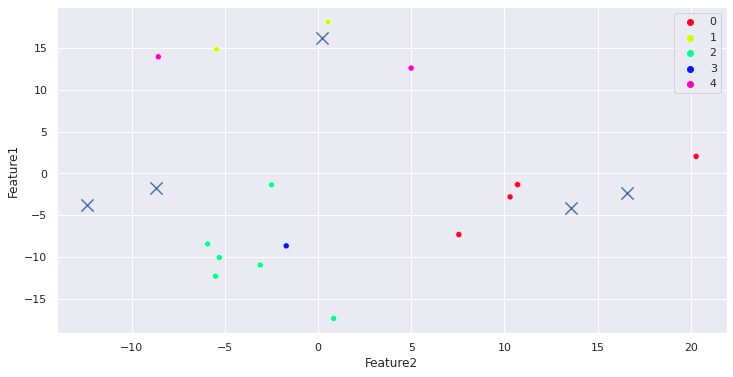

In [30]:
pyplot.figure(figsize=(12,6))
sns.scatterplot(y='Feature1',x='Feature2',data=Final_Report,hue='ClusterLabel',palette='gist_rainbow')
pyplot.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
pyplot.legend()
pyplot.show()

In [31]:
Final_Report=pd.concat([df,cluster_labels],axis=1)
Final_Report=Final_Report.dropna()
Final_Report

,content,time,title,ClusterLabel
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,4.0
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,2.0
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",1.0
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,3.0
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,2.0
...,...,...,...,...
4895,"Washington, Feb 28 (PTI) Scientists have devel...","01 Mar 2017,Wednesday",Computer method tells time according to person...,0.0
4896,The Akhil Bharatiya Vidyarthi Parishad (ABVP) ...,"01 Mar 2017,Wednesday",ABVP sacks its 2 members arrested for attackin...,1.0
4897,The number of registered rape cases in Madhya ...,"01 Mar 2017,Wednesday","4,527 women were raped last year in Madhya Pra...",4.0
4898,Intelligence agencies say stone-throwing prote...,"01 Mar 2017,Wednesday",4-yr-old boys indulging in stone pelting in Va...,3.0


In [32]:
Final_Report['ClusterLabel'].value_counts()

2.0    1625
4.0    1059
0.0     813
1.0     666
3.0     613
Name: ClusterLabel, dtype: int64

In [33]:
Final_Report

,content,time,title,ClusterLabel
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,4.0
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,2.0
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",1.0
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,3.0
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,2.0
...,...,...,...,...
4895,"Washington, Feb 28 (PTI) Scientists have devel...","01 Mar 2017,Wednesday",Computer method tells time according to person...,0.0
4896,The Akhil Bharatiya Vidyarthi Parishad (ABVP) ...,"01 Mar 2017,Wednesday",ABVP sacks its 2 members arrested for attackin...,1.0
4897,The number of registered rape cases in Madhya ...,"01 Mar 2017,Wednesday","4,527 women were raped last year in Madhya Pra...",4.0
4898,Intelligence agencies say stone-throwing prote...,"01 Mar 2017,Wednesday",4-yr-old boys indulging in stone pelting in Va...,3.0


In [34]:
Final_Report[Final_Report['ClusterLabel']==4]
# 0--International 
# 1--Economy 
# 2--Business
# 3--Sensex
# 4--Crime


,content,time,title,ClusterLabel
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,4.0
20,"Tribune News Service,New Delhi, September 22,T...","Sep 23, 2020\r\n ,0...",Supreme Court restrains Mistry from pledging T...,4.0
33,"New Delhi, September 23,Japanese auto major To...","Sep 24, 2020\r\n ,0...",Toyota unveils Urban Cruiser at Rs 8.4 lakh,4.0
39,Impacted by disruptions caused by the Covid pa...,"Sep 24, 2020\r\n ,0...",Indian economy to shrink by 5.9%: UN,4.0
46,"New Delhi, September 25,The Income Tax Departm...","Sep 26, 2020\r\n ,0...",Income Tax Department launches âFaceless Inc...,4.0
...,...,...,...,...
4882,"Dehradun, Mar 1 (PTI) Uttarakhand Governor K K...","02 Mar 2017,Thursday",International Yoga Festival begins in Rishikesh,4.0
4891,"Washington, Feb 27 (PTI) NASA plans to send it...","01 Mar 2017,Wednesday",NASA may send robotic spacecraft to Sun next year,4.0
4893,Indian designer Anita Dongre met the Duchess o...,"01 Mar 2017,Wednesday",Anita Dongre meets Duchess of Cambridge at Buc...,4.0
4897,The number of registered rape cases in Madhya ...,"01 Mar 2017,Wednesday","4,527 women were raped last year in Madhya Pra...",4.0


In [35]:
Final_Report['ClusterLabel']=Final_Report['ClusterLabel'].replace({0:'International',1:'Economy',2:'Business',3:'Sensex',4:'Crime',})


In [36]:
Final_Report

,content,time,title,ClusterLabel
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,Crime
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,Business
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",Economy
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,Sensex
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,Business
...,...,...,...,...
4895,"Washington, Feb 28 (PTI) Scientists have devel...","01 Mar 2017,Wednesday",Computer method tells time according to person...,International
4896,The Akhil Bharatiya Vidyarthi Parishad (ABVP) ...,"01 Mar 2017,Wednesday",ABVP sacks its 2 members arrested for attackin...,Economy
4897,The number of registered rape cases in Madhya ...,"01 Mar 2017,Wednesday","4,527 women were raped last year in Madhya Pra...",Crime
4898,Intelligence agencies say stone-throwing prote...,"01 Mar 2017,Wednesday",4-yr-old boys indulging in stone pelting in Va...,Sensex


In [37]:
Final_Report[Final_Report['ClusterLabel']=='Business']
# Select any news from Bollywood Category

,content,time,title,ClusterLabel
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,Business
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,Business
9,"Mumbai, September 24,Falling for the sixth str...","Sep 24, 2020\r\n ,1...","Sensex crashes 1,115 points amid global sell-o...",Business
11,"Mumbai, September 25,Equity benchmark Sensex r...","Sep 25, 2020\r\n ,0...",Sensex snaps 6-day losing streak; rallies 835 ...,Business
12,A depreciating rupee and stretched valuations ...,"Sep 22, 2020\r\n ,1...","Sensex, Nifty spiral lower for 4th day; IT sto...",Business
...,...,...,...,...
4873,"From Prasoon Srivastava Barcelona, Mar 2 (PTI)...","02 Mar 2017,Thursday",Idea of annual spectrum auction progressive: A...,Business
4879,Delhiites may soon look forward to a soothing ...,"02 Mar 2017,Thursday",Delhi Metro to introduce music on Airport Line,Business
4885,After Telangana Chief Minister K Chandrashekha...,"01 Mar 2017,Wednesday",Telangana CM gifts bungalows worth ?1 crore to...,Business
4886,The Jammu and Kashmir Police has busted a big ...,"01 Mar 2017,Wednesday","Police recover arms, explosives from goods tru...",Business


In [38]:
Final_Report[(Final_Report['ClusterLabel']=='Business') & (Final_Report['time']=='03 Aug 2017,Thursday')]

# Select news from movie category on a partcular date and time....

,content,time,title,ClusterLabel
464,"From her special numbers to TV?appearances, Bo...","03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,Business
466,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,Business
469,"In an interesting ruling, the Delhi high court...","03 Aug 2017,Thursday",Delhi HC reduces aid for 'negligent' accident ...,Business
475,Only 26 malls and commercial centres on Mehrau...,"03 Aug 2017,Thursday",19 Gurugram buildings to pay property tax over...,Business
478,The Supreme Court on Thursday refused to stay ...,"03 Aug 2017,Thursday",Gujarat Rajya Sabha polls to be held with NOTA...,Business
484,Dozens of street vendors will have to take the...,"03 Aug 2017,Thursday","Delhi's AIIMS, Safdarjung to be declared no-ha...",Business
490,The remains of a German hiker who disappeared ...,"03 Aug 2017,Thursday",German hiker found in Swiss Alps 30 yrs after ...,Business
493,Jammu and Kashmir police approached the Pakist...,"03 Aug 2017,Thursday",J&K cops ask Pak High Commission to claim LeT ...,Business
496,A suspected British prankster appears to have ...,"03 Aug 2017,Thursday",Email prankster fooled fired Trump media chief...,Business
1484,Popular comedian Kapil Sharma wished his forme...,"03 Aug 2017,Thursday",Kapil Sharma wishes Sunil Grover on his 40th b...,Business


In [39]:
Final_Report.sample(n=10)
#Select any 10 news randomly from the corpus

,content,time,title,ClusterLabel
2975,The Maharashtra government has decided to give...,"13 Jul 2017,Thursday",Maharashtra announces free insurance scheme fo...,Economy
1213,The Indian women's cricket team is the toast o...,"22 Jul 2017,Saturday",Women's World Cup win will be bigger than 2011...,Crime
307,"Lucknow/Noida, September 25,Farmers and agitat...","Sep 25, 2020\r\n ,0...",Farm Bills: Protests held across UP; farmers s...,International
2935,Indian Women?s Hockey team secured a hard-foug...,"13 Jul 2017,Thursday",Indian women's hockey team reaches HWL Semi-Fi...,Crime
4882,"Dehradun, Mar 1 (PTI) Uttarakhand Governor K K...","02 Mar 2017,Thursday",International Yoga Festival begins in Rishikesh,Crime
2838,"Two persons, including a policeman, were arres...","15 Jul 2017,Saturday","Gangster makes threat call from jail, two arre...",Business
4800,Steve Smith is in the middle of a raging contr...,"08 Mar 2017,Wednesday",Clarke endorses Kohli's stance on Smith's DRS ...,International
3902,"In a decade to 2016, the incidents of molestat...","06 May 2017,Saturday",Bengaluru molestation cases rise 417% over decade,Economy
1124,A 16-year-old Class 10 student allegedly raped...,"24 Jul 2017,Monday",16-yr-old rape victim gives birth to baby in D...,Sensex
4871,Bowing to pressure from citizens and green act...,"02 Mar 2017,Thursday","Govt scraps Bengaluru's ?1,761 cr steel flyove...",Business


In [53]:
print("Done")

Done
